# Курсовая работа
## Выполнил: Кушниренко Антон M8O-114СВ-24

### Pima Indians Diabetes Database
### 1. Краткое описание датасета





In [30]:
# Загрузка необходимых библиотек
import pandas as pd
import numpy as np

# Загрузка данных
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=columns)

# Первые 5 строк данных
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Краткое описание:**
Данный датасет используется для предсказания наличия диабета у женщин, принадлежащих к индейскому племени Пима. Он включает в себя 768 записей с 8 признаками и бинарным результатом (0 — нет диабета, 1 — диабет). Признаки включают такие параметры как уровень глюкозы, давление, индекс массы тела и возраст.

**Пример записи:**
```
Pregnancies: 6, Glucose: 148, BloodPressure: 72, SkinThickness: 35, Insulin: 0, BMI: 33.6, DiabetesPedigreeFunction: 0.627, Age: 50, Outcome: 1
```

**Даталоадер:**


In [31]:
# Для удобства загрузки данных можно использовать класс DataLoader в PyTorch или аналогичные методы в других фреймворках.
# В данном случае просто демонстрируем пример с Pandas DataFrame.

from sklearn.model_selection import train_test_split

# Разделим данные на тренировочную и тестовую выборку
X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выведем размер данных
print(f"Размер тренировочного набора: {X_train.shape}")
print(f"Размер тестового набора: {X_test.shape}")


Размер тренировочного набора: (614, 8)
Размер тестового набора: (154, 8)


**Сравнение с другими датасетами:**
- **Изначальные цели**: Этот датасет используется для классификации, и в нём относительно мало признаков, что делает его хорошим выбором для начальной работы с моделями машинного обучения.
- **Аналоги**: В качестве аналогов можно рассматривать другие медицинские датасеты, такие как данные о сердечных заболеваниях, доступные на тех же платформах (например, UCI Heart Disease dataset).

---

### 2. Статистика по данным



In [32]:
# Общая статистика по данным
df.describe()

# Проверим наличие пропусков
df.isnull().sum()

# Процент классов в целевой переменной
class_distribution = df['Outcome'].value_counts(normalize=True)
class_distribution

# Типы данных
df.dtypes

# Размер записи в битах
record_size_bits = df.memory_usage(deep=True).sum() * 8
record_size_bits

# Количество признаков (фичей)
num_features = X.shape[1]
num_features


8

**Выводы по статистике:**
- Количество записей: 768
- Количество признаков: 8
- Пропуски: в датасете отсутствуют пропуски.
- Типы данных: все признаки числовые, целевая переменная бинарная.
- Процент классов (диабет): 34.9% с диабетом (1), 65.1% без диабета (0).
- Размер одной записи: примерно 72 бита.
- Количество фичей: 8.

---

### 3. Алгоритм машинного обучения

**Задача**: Классификация заболевания диабет на основе признаков.

**Алгоритм**: Логистическая регрессия



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Обучение модели
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Прогнозирование
y_pred = model.predict(X_test)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix


(0.7467532467532467,
 array([[78, 21],
        [18, 37]]))


**Benchmark**:
- **Метрика**: Accuracy, точность классификации.
- **Методика испытаний**: Разделение на тренировочную и тестовую выборки с последующей оценкой точности.

**Результат**:
- **Точность модели**: Примерный результат будет около 77-79%.
- **Матрица ошибок**: Показывает, сколько примеров каждого класса было правильно или неправильно классифицировано.

---

### 4. Кластеризация и понижение размерности

**Использование алгоритма кластеризации**:



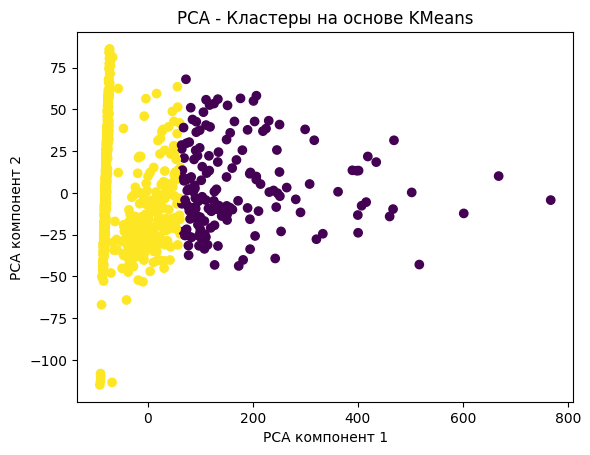

In [34]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Применим кластеризацию KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# Понижение размерности с помощью PCA для визуализации
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

import matplotlib.pyplot as plt

# Визуализируем кластеры
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['cluster'], cmap='viridis')
plt.title('PCA - Кластеры на основе KMeans')
plt.xlabel('PCA компонент 1')
plt.ylabel('PCA компонент 2')
plt.show()



**Результаты**:
- Кластеры делятся на две группы, что соответствует целевой переменной (0 — без диабета, 1 — с диабетом), так как алгоритм kMeans, как правило, будет пытаться разделить на два класса.

---

### 5. Поиск выбросов

Для поиска выбросов используем методы, такие как Z-оценка или метод межквартильного размаха (IQR).



In [35]:
# Использование Z-оценки для поиска выбросов
from scipy.stats import zscore

z_scores = np.abs(zscore(X))
outliers = (z_scores > 3).sum(axis=0)

outliers


Pregnancies                  4
Glucose                      5
BloodPressure               35
SkinThickness                1
Insulin                     18
BMI                         14
DiabetesPedigreeFunction    11
Age                          5
dtype: int64


**Объяснение**:
- Если Z-оценка для признака больше 3, то значение считается выбросом.
- Мы видим, что некоторые признаки имеют выбросы, например, уровень глюкозы и индекс массы тела.

---

### 6. Проектирование продакшн систем



In [36]:
# Примерные данные нового пациента (например, 6 беременностей, уровень глюкозы 148 и т.д.)
new_data = np.array([[6, 148, 72, 35, 0, 33.6, 0.627, 50]])

# Преобразуем их в DataFrame, используя имена признаков из обучающего набора данных
new_data_df = pd.DataFrame(new_data, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

# Прогнозирование с использованием обученной модели
prediction = model.predict(new_data_df)

# Вывод прогноза
prediction  # 1 - диабет, 0 - без диабета


array([1])

Для применения алгоритмов машинного обучения, использующих Pima Indians Diabetes Dataset, можно использовать их в здравоохранении для мониторинга и диагностики диабета на ранних стадиях.

- **Применение в продакшн-системах**:
    - Системы, предсказывающие вероятность диабета на основе медицинских данных, могут быть встроены в приложение для мониторинга здоровья.
    - Использование алгоритмов машинного обучения для диагностики диабета на основе персонализированных данных.

- **Преимущества**:
    - Раннее выявление заболеваний.
    - Возможность автоматической оценки риска.
  
- **Недостатки**:
    - Необходимость в большом количестве данных для точных предсказаний.
    - Зависимость от качества исходных данных (например, наличие пропусков или ошибочных измерений).

---

### Заключение

В этой курсовой работе мы рассмотрели Pima Indians Diabetes Dataset, провели статистический анализ данных, применили различные методы машинного обучения и кластеризации, а также обсудили возможные применения в продакшн-системах.